# Stratified GridSearchCV

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

Rozważmy zbiór Breast Cancer

In [2]:
np.random.seed(1)
cancer = datasets.load_breast_cancer()
# print description
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
# get the data
X = cancer.data
y = cancer.target

Podzielmy zbiór na część testową i treningową .

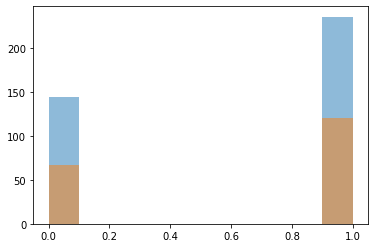

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

plt.hist(y_train, alpha=0.5)
plt.hist(y_test, alpha=0.5)
plt.show()

# Zadanie
Znajdż najleprzy model dzieląc na zbiór testowy i terningowy dla 

* SVM z jądrem rbf
* SVM z jądrem poly
* SVM liniowego
* Regresji logistycznej


In [5]:
from sklearn.model_selection import StratifiedKFold

seed=123
kfold = StratifiedKFold(n_splits=5, random_state=seed, shuffle = True)

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000],
              'gamma': [0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

grid_1 = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=kfold, return_train_score=True)

grid_1.fit(X_train, y_train)
grid_1.best_params_

{'C': 100000, 'gamma': 1e-07}

In [10]:
param_grid = {'degree' : [1, 2, 3, 4, 5, 6, 7], 
              'coef0': [0,1],
              'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]}

grid_2 = GridSearchCV(SVC(kernel = 'poly'), param_grid, cv=kfold, return_train_score=True)

grid_2.fit(X_train, y_train)
grid_2.best_params_

{'C': 1000000, 'coef0': 1, 'degree': 2}

In [11]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

grid_3 = GridSearchCV(SVC(kernel = 'linear'), param_grid, cv=kfold, return_train_score=True)

grid_3.fit(X_train, y_train)
grid_3.best_params_

{'C': 1}

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}

grid_4 = GridSearchCV(linear_model.LogisticRegression(max_iter=10000), param_grid, cv=kfold, return_train_score=True)

grid_4.fit(X_train, y_train)
grid_4.best_params_

/Users/jakubstepien/miniforge3/envs/env_tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jakubstepien/miniforge3/envs/env_tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

{'C': 1000}

In [13]:
def heatmap(values, xlabel, ylabel, xticklabels, yticklabels, cmap=None,
            vmin=None, vmax=None, ax=None, fmt="%0.2f"):
    if ax is None:
        ax = plt.gca()
    # plot the mean cross-validation scores
    img = ax.pcolor(values, cmap=cmap, vmin=vmin, vmax=vmax)
    img.update_scalarmappable()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(np.arange(len(xticklabels)) + .5)
    ax.set_yticks(np.arange(len(yticklabels)) + .5)
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    ax.set_aspect(1)

    for p, color, value in zip(img.get_paths(), img.get_facecolors(),
                               img.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.mean(color[:3]) > 0.5:
            c = 'k'
        else:
            c = 'w'
        ax.text(x, y, fmt % value, color=c, ha="center", va="center")
    return img

In [14]:
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_1.cv_results_)
# show the first 5 rows
# display(results.head())

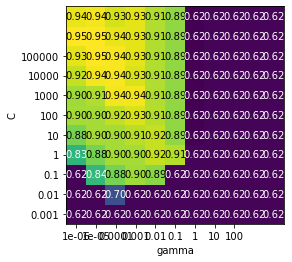

In [16]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000],
              'gamma': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
scores = np.array(results.mean_test_score).reshape(11, 11)
# plot the mean cross-validation scores
heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'], ylabel='C', yticklabels=param_grid['C'], cmap="viridis")
plt.show()

# Zad

Popraw greed i narysuj rysunek

* 0.0001

In [17]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000],
              'gamma': [0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

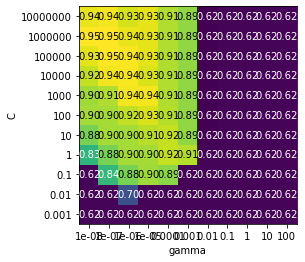

In [18]:
results = pd.DataFrame(grid_1.cv_results_)
scores = np.array(results.mean_test_score).reshape(11, 11)
heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'], ylabel='C', yticklabels=param_grid['C'], cmap="viridis")
plt.show()

In [19]:
from sklearn import  metrics


models = []
models.append(('SVM rbf', grid_1.best_estimator_))
models.append(('SVM poly', grid_2.best_estimator_))
models.append(('SVM linear', grid_3.best_estimator_))
models.append(('logistic regression', grid_4.best_estimator_))


precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
for name, model in models:
    print(name)
    print("R^2: {}".format(metrics.precision_score(y_test, model.predict(X_test)) ))
    print("recall_score: {}".format( metrics.recall_score(y_test, model.predict(X_test)) ))
    print("f1_score: {}".format( metrics.f1_score(y_test, model.predict(X_test)) ))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test, model.predict(X_test)) ))
    precision_score.append(metrics.precision_score(y_test, model.predict(X_test)))
    recall_score.append(metrics.recall_score(y_test, model.predict(X_test)))
    f1_score.append( metrics.f1_score(y_test, model.predict(X_test)))
    accuracy_score.append(metrics.accuracy_score(y_test, model.predict(X_test)))

SVM rbf
R^2: 0.9754098360655737
recall_score: 0.9834710743801653
f1_score: 0.9794238683127573
accuracy_score: 0.973404255319149
SVM poly
R^2: 0.9590163934426229
recall_score: 0.9669421487603306
f1_score: 0.962962962962963
accuracy_score: 0.9521276595744681
SVM linear
R^2: 0.9669421487603306
recall_score: 0.9669421487603306
f1_score: 0.9669421487603306
accuracy_score: 0.9574468085106383
logistic regression
R^2: 0.9914529914529915
recall_score: 0.9586776859504132
f1_score: 0.9747899159663866
accuracy_score: 0.9680851063829787


In [20]:
import pandas as pd
d = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['SVM rbf','SVM poly', 'SVM linear', 'logistic regression'])
df

,Method,precision_score,recall_score,f1_score,accuracy_score
0,SVM rbf,0.975410,0.983471,0.979424,0.973404
1,SVM poly,0.959016,0.966942,0.962963,0.952128
2,SVM linear,0.966942,0.966942,0.966942,0.957447
3,logistic regression,0.991453,0.958678,0.974790,0.968085
